<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

## Practice Loading and Describing Data 

_Authors: Matt Brems (DC)_


### Marissa Wiener
10/29/18
- Assignment: Complete lab assignment replacing Boston dataset with your project dataset

### Summary of Takeaways 

***Data Adjustments:***
1. From this analysis, I think the best way forward will be to increase my dataset by setting up a streaming twitter feed (or just collecting more data each day)
- Expand/improve search parameters (*juul*, *juuling*, #s)
2. Remove retweets and only retain tweets with the word _juul_ in it, not the screen name

***Project Workflow:***
1. Feature engineer the columns defined in this set. Think of new features, ex.) if *vape* or *juul* is in username/profile description, number of times *juul* is referenced in the tweet, use clustering model on profile description text (be careful with this)
2. Added feature of interest: use NLP/sentiment analysis to classify tweet text
3. Use these to predict if a tweet referencing juuling will be retweeted/favorited (classification), or count retweets/favorites using *retweet_count* or *favorite_count* columns
4. See impact of sentiment

In [10]:
import pandas as pd
import json
import os
import seaborn as sns
import random
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight') # pyplt call style of plt, call use method and use 'fivethirtyeight'
%matplotlib inline 

# Increase default figure and font sizes for easier viewing.
plt.rcParams['figure.figsize'] = (16, 8) # rcParams is another pyplot method - can set figure size and plot size
plt.rcParams['font.size'] = 14

### 1. Load the dataset

In [11]:
df = pd.read_csv('juul.csv').drop('Unnamed: 0', axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0,1,2,5,12,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [12]:
df.describe()

,followers_count,friends_count,listed_count,favourites_count,statuses_count,retweet_count,favorite_count,longitude,latitude,unique_tweet_id,short_tweet_id,recent_stat_summary,find_most_recent,most_recent_id,retweet_indicator,favorite_indicator
count,3.946100e+04,3.946100e+04,3.946100e+04,39461.000000,3.945800e+04,39458.000000,39458.000000,61.000000,61.000000,39458.000000,39458.000000,3.945800e+04,3.945800e+04,3.945800e+04,39458.000000,39458.000000
mean,2.199658e+04,1.534267e+08,1.534260e+08,13526.578926,1.864793e+04,2.073927,14.266486,-91.737239,35.925268,55844.666684,59605.951214,5.525834e+04,5.158808e+12,5.158808e+12,0.191343,0.679305
std,4.484835e+05,1.759588e+10,1.759588e+10,24295.486482,5.289853e+04,107.489844,669.063914,15.938892,5.589981,40344.966424,44755.977830,4.625950e+05,6.066495e+13,6.066495e+13,0.393363,0.466750
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,1.000000e+00,0.000000,0.000000,-122.330800,25.781940,1.000000,2.000000,2.000000e+00,2.018103e+08,2.018103e+08,0.000000,0.000000
25%,1.550000e+02,1.790000e+02,0.000000e+00,1248.000000,1.488250e+03,0.000000,0.000000,-97.928180,30.758230,20480.250000,20842.750000,5.059250e+03,2.018112e+11,2.018112e+11,0.000000,0.000000
50%,3.900000e+02,3.450000e+02,2.000000e+00,5650.000000,6.019000e+03,0.000000,1.000000,-89.657912,36.063200,46594.000000,57496.000000,1.601150e+04,2.018111e+12,2.018111e+12,0.000000,1.000000
75%,8.170000e+02,6.280000e+02,7.000000e+00,15595.000000,1.759725e+04,0.000000,5.000000,-78.835950,40.583230,92526.500000,92007.000000,3.912825e+04,2.018112e+12,2.018112e+12,0.000000,1.000000
max,4.232852e+07,2.018113e+12,2.018113e+12,640728.000000,3.030093e+06,18810.000000,121869.000000,-71.276700,47.604600,148851.000000,152476.000000,4.289096e+07,2.018113e+15,2.018113e+15,1.000000,1.000000


### 3.  Conduct a brief integrity check of your data. 

This integrity check should include, but is not limited to, checking for missing values and making sure all values make logical sense. (i.e. is one variable a percentage, but there are observations above 100%?)

Summarize your findings in a few sentences, including what you checked and, if appropriate, any 
steps you took to rectify potential integrity issues.

In [13]:
# check dimensions and datatypes
print(df.shape)
print(df.dtypes[df.dtypes=='object'])
df.dtypes[df.dtypes!='object']

(67790, 31)
id                     object
date_scraped           object
tweet_date             object
tweet_datetime         object
tweet_hour             object
tweet_time             object
tweet_day_of_week      object
text                   object
lang                   object
screen_name            object
location               object
protected              object
profile_description    object
geo_enabled            object
verified               object
dtype: object


followers_count        float64
friends_count          float64
listed_count           float64
favourites_count       float64
statuses_count         float64
retweet_count          float64
favorite_count         float64
longitude              float64
latitude               float64
unique_tweet_id        float64
short_tweet_id         float64
recent_stat_summary    float64
find_most_recent       float64
most_recent_id         float64
retweet_indicator      float64
favorite_indicator     float64
dtype: object

In [14]:
# check categorical columns
# seems like there are many non english languages (en) - will want to
# ensure all the tweets analyzed are in english bc 'juul' could mean
# something else 
for col in ['lang','protected','geo_enabled','verified','tweet_time','tweet_date','tweet_day_of_week']:
    print(df[col].value_counts())
    
print(df.describe())

en     44816
et      3563
da       207
sv       118
pl        82
hi        80
und       78
in        71
nl        71
fi        45
ro        32
tl        22
hu         9
ht         5
de         3
it         2
5          1
3          1
cy         1
0          1
cs         1
Name: lang, dtype: int64
False     32768
False     16438
72899         1
125472        1
131411        1
Name: protected, dtype: int64
True     15167
True     10458
False     7855
False     5978
1            2
0            1
Name: geo_enabled, dtype: int64
False    38315
True      1143
Name: verified, dtype: int64
nighttime    27515
daytime      21691
False            3
Name: tweet_time, dtype: int64
Davison, MI    18581
2018-11-16     11732
2018-11-14      2762
2018-11-15      2458
2018-11-13      1882
2018-11-22      1125
2018-11-09      1079
2018-11-19      1073
2018-11-17      1065
2018-11-21      1061
2018-11-20      1034
2018-10-23      1034
2018-10-31      1008
2018-10-22      1007
2018-10-21      1001
2018-11-

In [9]:
lang_df = df[['text','lang']]
[print(lang_df[lang_df['lang']==lang].head()) for lang in lang_df.lang.unique()]
## need to filter out ja,es,fr,pt,iw, tr, ko, zh, no

                                                  text lang
0    Mango Twist 55mg 🔥🔥🔥 #saltnic  #saltnicotine #...   tl
721  popular opinion: juuling a big gey https://t.c...   tl
745  Juuling in Highschool https://t.co/EJk1yoBwoc ...   tl
749  Juuling in Highschool https://t.co/KsG2DDJe2g ...   tl
984                   okay juuling is sick s/o america   tl
                                                text lang
1  Strawberry Lemonade 🍓🍋 15ml bottles now availa...   en
2  55mg Blue Rasberry Pod Juice. Fill up your Suo...   en
3  Juuling may be trendy, but that doesn’t mean i...   en
4  "It's a wonderful, wonderful alternative to sm...   en
6    Two peas in a #juul pod https://t.co/Zyf46ta47Z   en
                                                 text lang
5       #Juul #vaping #vape #vapelife #ecigs #smoking  und
9   #JUUL\r\n\r\nhttps://t.co/UHYkkIKB3c https://t...  und
11       #AD #JUUL #SPONSORED https://t.co/QL4DpToIll  und
37  https://t.co/F4WvyIlEaT\r\n\r\n#snowwolf @snow...  u

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [6]:
# check out location info
print(df['location'].value_counts())
print(len(df.location.unique()))
df[['longitude','latitude']].describe() # very sparse location information,
                                        # may have to depend on user supplied

United States                508
New York, NY                 405
Chicago, IL                  359
Los Angeles, CA              330
California, USA              203
Houston, TX                  198
Texas, USA                   190
Brooklyn, NY                 174
Dallas, TX                   163
New York, USA                163
Ohio, USA                    156
Florida, USA                 153
Philadelphia, PA             139
Austin, TX                   132
Boston, MA                   130
Atlanta, GA                  118
San Francisco, CA            112
Seattle, WA                  111
Las Vegas, NV                111
Pittsburgh, PA               110
Denver, CO                   103
New York                     102
Miami, FL                    102
Illinois, USA                 98
Pennsylvania, USA             95
Washington, DC                95
Virginia, USA                 95
Indiana, USA                  94
North Carolina, USA           89
Phoenix, AZ                   89
          

,longitude,latitude
count,41.000000,41.000000
mean,-88.645018,35.497069
std,14.756162,6.104746
min,-118.517967,20.674570
25%,-95.620197,30.267700
50%,-83.009580,35.082809
75%,-76.488681,40.583230
max,-71.276700,44.232708


In [7]:
# self reported locations can be hit or miss in terms of useful info...
df[df['location'] == 'Somewhere in the moshpit']

,id,date_scraped,tweet_date,tweet_datetime,tweet_hour,tweet_time,tweet_day_of_week,text,lang,screen_name,...,statuses_count,retweet_count,favorite_count,longitude,latitude,unique_tweet_id,short_tweet_id,recent_stat_summary,find_most_recent,most_recent_id
14949,1057101708973621248,20181107,2018-10-30,2018-10-30 02:47:42,2,nighttime,Tuesday,I think “where’s my juul” is the most asked qu...,en,julian_infinity,...,13464,0,2,NaN,NaN,32064,19117,23613,2.018111e+12,2.018111e+12


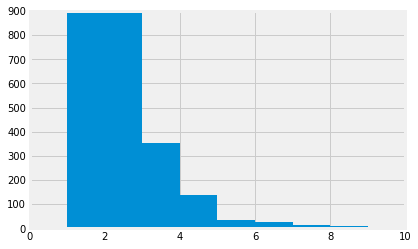

screen_name
JUULvapor          55
ChaunceyGardner    34
shaddaibot         23
agladstone         21
intrnetdaughter    16
KEEPlTMOVlNG       15
Vaping360          15
DixieSmokeShop     14
dave_schilling     14
ExBaeTM            14
DeclanMcGeese      13
cutenspoiled33     12
talleybowde        12
zingingcutie22     12
rphallisey845      11
anxietybehittin    11
IceSchzu           11
thevapelove        11
SarahCassarah      11
isp_09             10
thejuulguy         10
japan_vapor        10
katolstyka         10
MacieMorello       10
souljaericc         9
memestation2        9
murdemp             9
fuccitsbriley       8
420TOZIER           8
annaxdean           8
                   ..
issayagirlitt       1
issaliciaa          1
isolatte            1
isobeljulia         1
ismaririvera        1
ismael_brah420      1
isma3618            1
islanddyesrva       1
islandddbabe        1
isischiquito        1
isiahishere         1
ishthekidd27        1
ishalyschroeder     1
isaiavio            

JUULvapor          55
thejuulguy         10
ArtJuulNews         5
juulwraps           4
robloxjuulman       3
MetroJuulin         3
wannahitmyjuul      2
dyjuul1             2
Juulliard           2
juulkiinvallado     1
JuulWallican        1
JuulNo1             1
supdudeypujuul      1
juulwry             1
kingjuulian247      1
fuck_juul           1
juulootoot          1
Juulius_Caesar      1
AMangoJuulPod       1
wheredthejuulgo     1
MOXJUUL             1
Juul_Baby_1999      1
runthejuul          1
Name: screen_name, dtype: int64

In [8]:
# let's check out the number of tweets by user
sn_counts = df.groupby('screen_name').most_recent_id.count()
#print(sn_counts) 
# looks reasonable (mean ~1) with some outliers
plt.hist(sn_counts, bins=list(range(1,50)))
plt.ylim([0,900])
plt.xlim([0,10])
plt.show()
# # for easier searching ability, create lowered version of screen names
df['screen_name_lower'] = df.screen_name.apply(lambda sn: sn.lower())
# probably not great if we have a ton of tweets from certain users
# seems like an issue with having 'juul' in screen name
print(df.groupby('screen_name').most_recent_id.count().sort_values(ascending = False))
df[df.screen_name_lower.str.contains('juul')].screen_name.value_counts()

In [13]:
# A:
print(df.isnull().sum())

id                         0
date_scraped               0
tweet_date                 0
tweet_datetime             0
tweet_hour                 0
tweet_time                 0
tweet_day_of_week          0
text                       0
lang                       0
screen_name                0
location                 746
protected                  0
profile_description     2133
followers_count            0
friends_count              0
listed_count               0
favourites_count           0
geo_enabled                0
verified                   0
statuses_count             0
retweet_count              0
favorite_count             0
longitude              21529
latitude               21529
unique_tweet_id            0
short_tweet_id             0
recent_stat_summary        0
find_most_recent           0
most_recent_id             0
screen_name_lower          0
dtype: int64


### 4. For what two attributes does it make the *least* sense to calculate mean and median? Why?

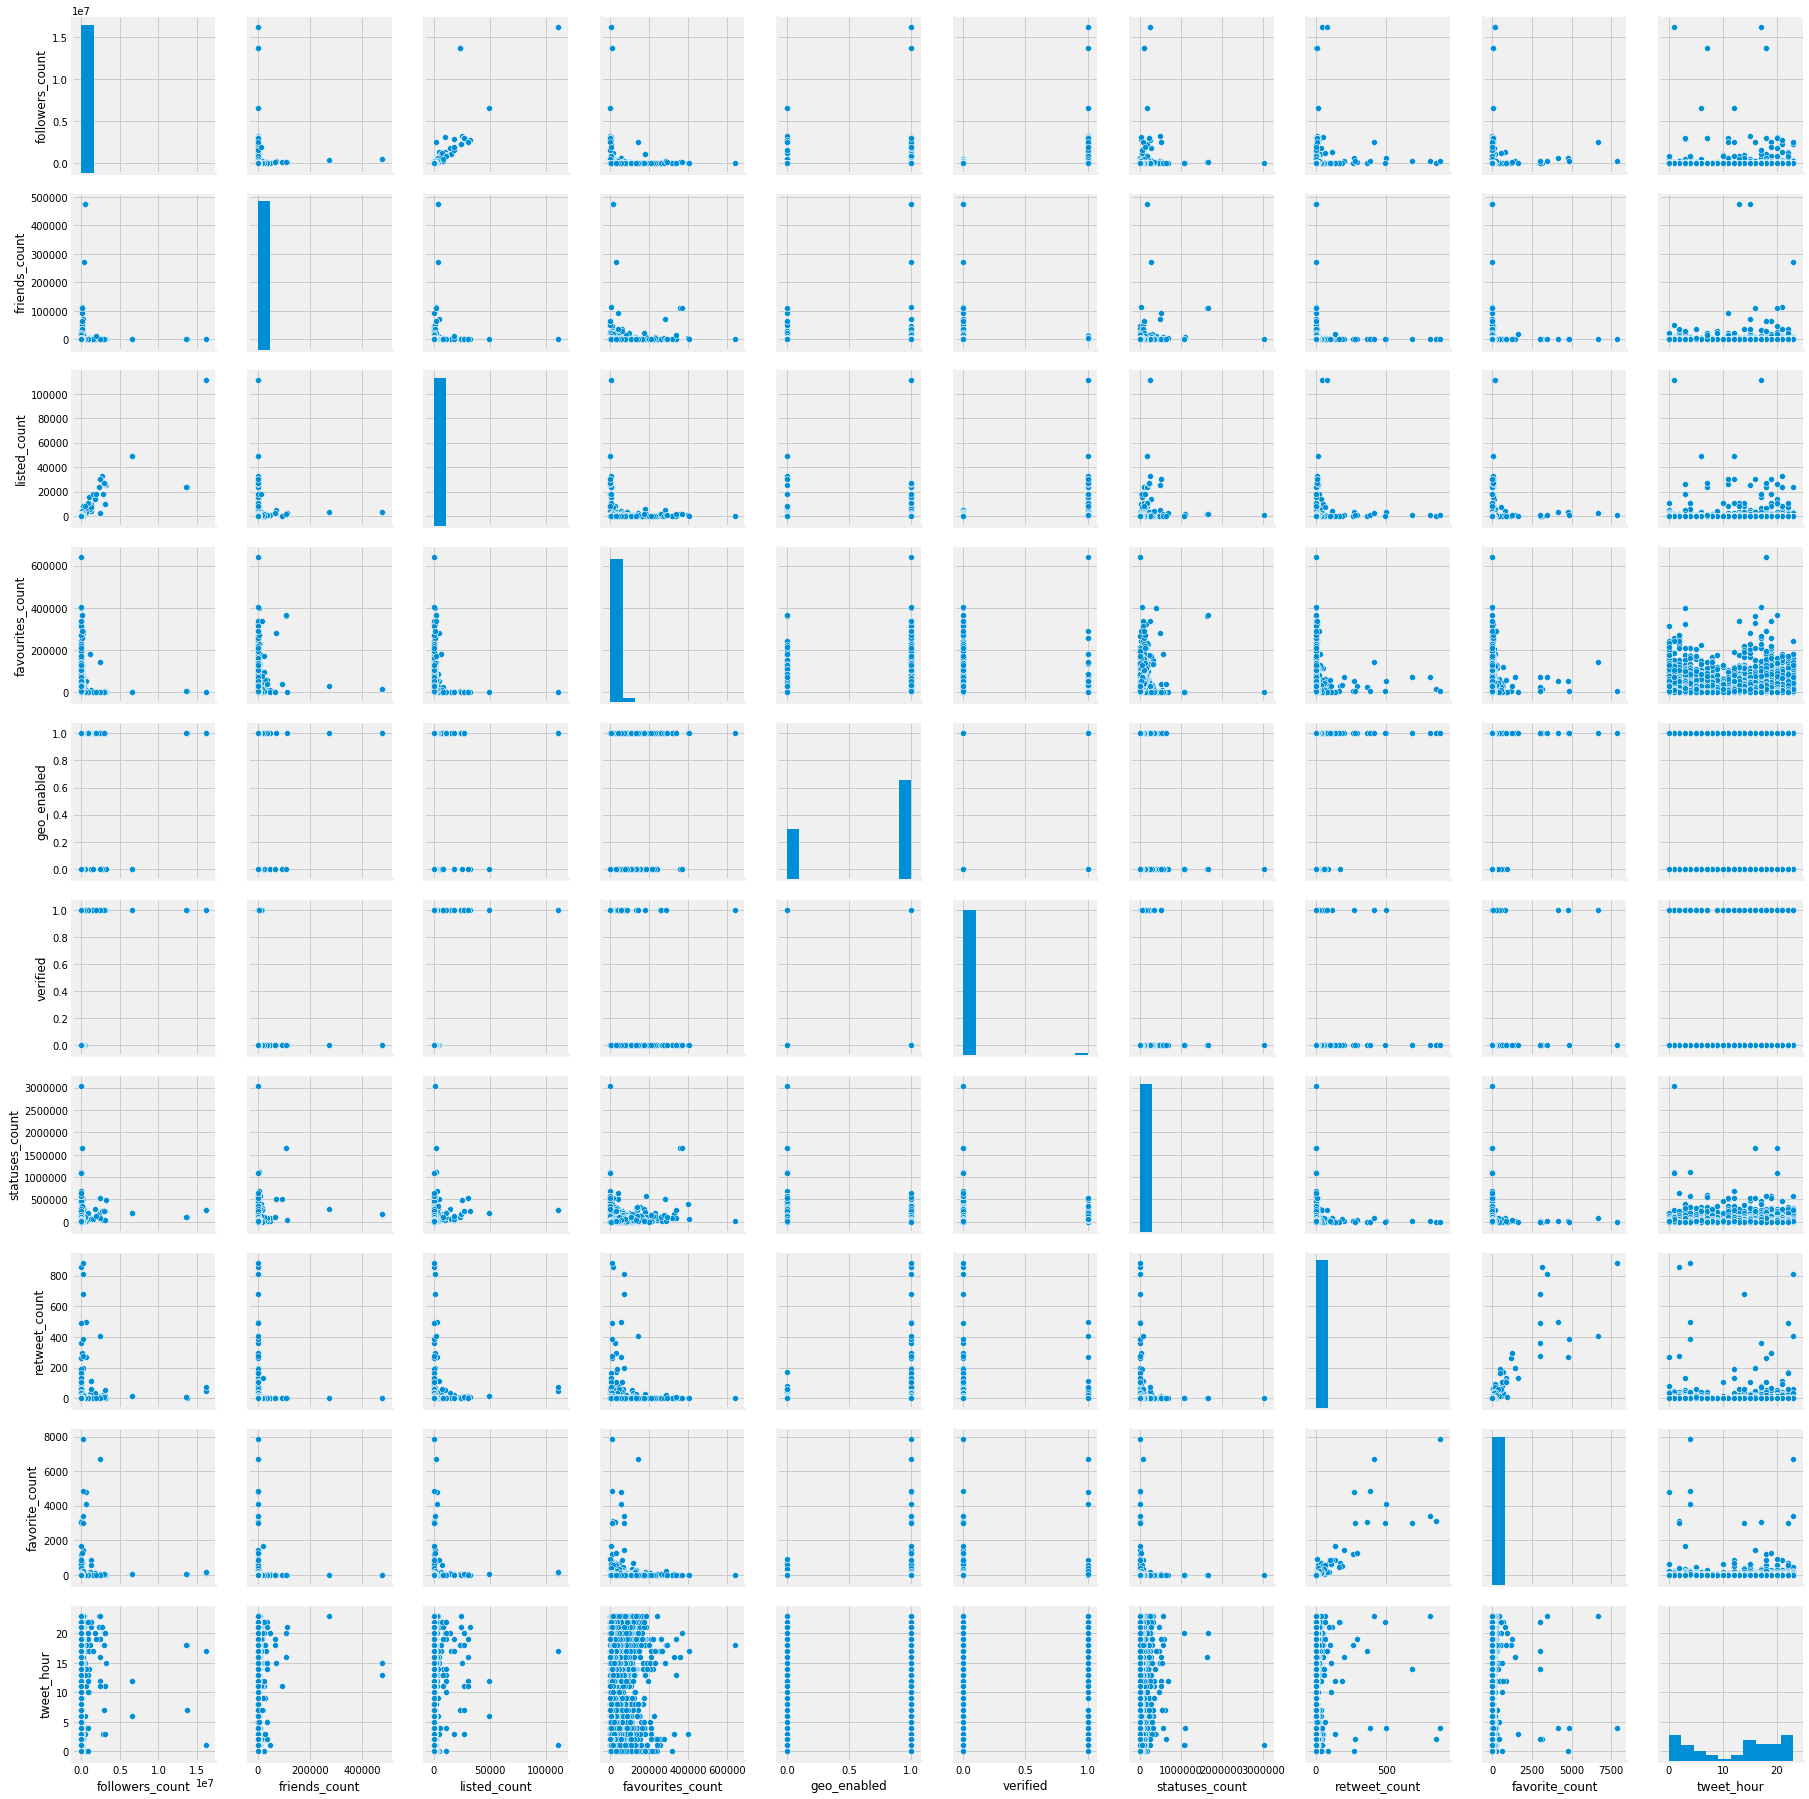

In [14]:
# use a pairplot to look at the numeric columns to determine this
numeric_cols = ['followers_count','friends_count','listed_count',\
                'favourites_count','geo_enabled','verified','statuses_count',\
                'retweet_count','favorite_count','tweet_hour']

sns.pairplot(df[numeric_cols])

In [15]:
df[numeric_cols].describe()

,followers_count,friends_count,listed_count,favourites_count,statuses_count,retweet_count,favorite_count,tweet_hour
count,2.157000e+04,21570.000000,21570.000000,21570.000000,2.157000e+04,21570.000000,21570.000000,21570.000000
mean,9.249508e+03,661.690403,73.292119,13954.931433,1.570242e+04,0.940519,8.238387,12.169819
std,2.481892e+05,5365.058899,1461.799132,23820.616507,4.377344e+04,14.028102,106.831149,7.899805
min,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000
25%,1.560000e+02,176.000000,0.000000,1482.250000,1.400250e+03,0.000000,0.000000,4.000000
50%,3.870000e+02,338.000000,2.000000,6192.500000,5.723000e+03,0.000000,2.000000,15.000000
75%,7.870000e+02,601.000000,6.000000,16312.000000,1.635675e+04,0.000000,5.000000,19.000000
max,1.611834e+07,475632.000000,110993.000000,640728.000000,3.030093e+06,883.000000,7844.000000,23.000000


                                                    text      screen_name  \
1048   JUUL hasn’t been actively pursuing product pla...       Refinery29   
2270   #1. Throw the Juul out your window before you ...    voguemagazine   
2499   Juul's social media draws alarming number of t...          CBSNews   
2580   Juul's social media draws alarming number of t...          CBSNews   
3513   “Pod-mod” e-cigarettes like Juul look like a U...      ScienceNews   
4048   #1. Throw the Juul out your window before you ...    voguemagazine   
4889   Juul used 'relaxation, freedom, and sex appeal...  businessinsider   
6269   Miami Students Want Mascot To Put Down Pipe An...   barstoolsports   
6379   Miami students started a petition to change th...            SInow   
7278   E-cigarette maker Juul spent nearly $1.2 milli...             CNBC   
7406   Juul in particular came to play. \r\n\r\nhttps...   ReformedBroker   
7407   It’s a fascinating time to be watching Canopy ...   ReformedBroker   

,id,date_scraped,tweet_date,tweet_datetime,tweet_hour,tweet_time,tweet_day_of_week,text,lang,screen_name,...,retweet_count,favorite_count,longitude,latitude,unique_tweet_id,short_tweet_id,recent_stat_summary,find_most_recent,most_recent_id,screen_name_lower
4889,1055797493307506688,20181030,2018-10-26,2018-10-26 12:25:12,12,daytime,Friday,"Juul used 'relaxation, freedom, and sex appeal...",en,businessinsider,...,15,18,NaN,NaN,4648,12917,3055059,2.018103e+14,2.018103e+14,businessinsider
12753,1058036153662795777,20181107,2018-11-01,2018-11-01 16:40:51,16,daytime,Thursday,"MORGAN STANLEY: Juul, Silicon Valley's favorit...",en,businessinsider,...,5,9,NaN,NaN,27327,24233,3059637,2.018111e+14,2.018111e+14,businessinsider
17701,1060971009757601797,20181113,2018-11-09,2018-11-09 19:02:55,19,nighttime,Friday,Juul will reportedly stop selling most flavore...,en,businessinsider,...,11,19,NaN,NaN,48603,46078,3056061,2.018111e+14,2.018111e+14,businessinsider
18013,1060853660454961153,20181113,2018-11-09,2018-11-09 11:16:37,11,daytime,Friday,US crack down on candy and fruit flavored e-ci...,en,businessinsider,...,5,12,NaN,NaN,52441,41979,3056080,2.018111e+14,2.018111e+14,businessinsider


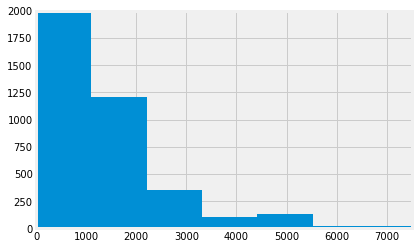

In [17]:
print(df[df.followers_count > 1000000][['text','screen_name','followers_count']])# a few news accounts
plt.hist(df[df.followers_count < 100000]['friends_count'], bins=100)
plt.xlim([1,7500])
plt.ylim([1,2000])

df[df.screen_name == 'businessinsider']

In [69]:
# A:
# most of the data columns are highly skewed, which would give reason to use/calculate the median
# it would make the least sense to calculate the median on binary variables (true/false) 
# and also categorical data

### 5. Which two variables have the strongest linear association? 

Report both variables, the metric you chose as the basis for your comparison, and the value of that metric. *(Hint: Make sure you consider only variables for which it makes sense to find a linear association.)*

                  tweet_hour  followers_count  friends_count  listed_count  \
tweet_hour          1.000000         0.005592       0.011805      0.007554   
followers_count     0.005592         1.000000       0.025816      0.850630   
friends_count       0.011805         0.025816       1.000000      0.039711   
listed_count        0.007554         0.850630       0.039711      1.000000   
favourites_count   -0.017028        -0.003854       0.067641      0.000929   
geo_enabled        -0.009230         0.008363       0.019004      0.003105   
verified            0.041042         0.234184       0.021777      0.288919   
statuses_count     -0.002675         0.136357       0.175120      0.207244   
retweet_count       0.002488         0.070104       0.004056      0.059473   
favorite_count     -0.001938         0.060561       0.003538      0.029033   
longitude          -0.245645         0.005715      -0.330423      0.096204   
latitude            0.004400         0.072637      -0.220947    

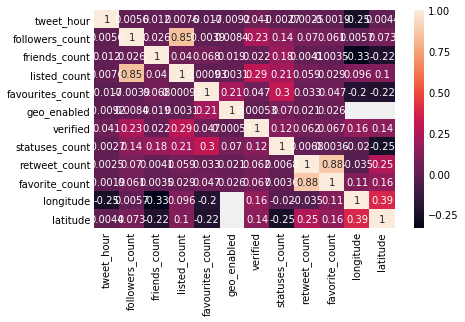

In [18]:
# A:
# generally speaking,correlation > .4 or < -.4 is considered strong
# strongest (.764): listed count & follower count
# second strongest (.427): friend count & status count - more interesting, but intuitive


print(df.drop(['id','date_scraped','unique_tweet_id',
              'short_tweet_id','recent_stat_summary',
              'find_most_recent', 'most_recent_id','protected'], 
              axis = 1).corr())
print(df.corr().drop(['id','date_scraped','unique_tweet_id',
              'short_tweet_id','recent_stat_summary',
              'find_most_recent', 'most_recent_id','protected'], 
              axis = 1).max())
sns.heatmap(df.drop(['id','date_scraped','unique_tweet_id',
              'short_tweet_id','recent_stat_summary',
              'find_most_recent', 'most_recent_id','protected'], 
              axis = 1).corr(),annot=True) #,figsize=(16,8)

### 6. Look at distributional qualities of variables.

Answer the following questions:
1. Which variable has the most symmetric distribution? 
2. Which variable has the most left-skewed (negatively skewed) distribution? 
3. Which variable has the most right-skewed (positively skewed) distribution? 

Defend your method for determining this.

In [19]:
df[numeric_cols].describe()

,followers_count,friends_count,listed_count,favourites_count,statuses_count,retweet_count,favorite_count,tweet_hour
count,2.157000e+04,21570.000000,21570.000000,21570.000000,2.157000e+04,21570.000000,21570.000000,21570.000000
mean,9.249508e+03,661.690403,73.292119,13954.931433,1.570242e+04,0.940519,8.238387,12.169819
std,2.481892e+05,5365.058899,1461.799132,23820.616507,4.377344e+04,14.028102,106.831149,7.899805
min,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000
25%,1.560000e+02,176.000000,0.000000,1482.250000,1.400250e+03,0.000000,0.000000,4.000000
50%,3.870000e+02,338.000000,2.000000,6192.500000,5.723000e+03,0.000000,2.000000,15.000000
75%,7.870000e+02,601.000000,6.000000,16312.000000,1.635675e+04,0.000000,5.000000,19.000000
max,1.611834e+07,475632.000000,110993.000000,640728.000000,3.030093e+06,883.000000,7844.000000,23.000000


{'followers_count': -0.9581599363959699, 'friends_count': -0.4891870906772682, 'listed_count': -0.9727119363455627, 'favourites_count': -0.5562500589893212, 'geo_enabled': 0.504079213443972, 'verified': -1.0, 'statuses_count': -0.6355337810504083, 'retweet_count': -1.0, 'favorite_count': -0.7572340210014519, 'tweet_hour': 0.23255734220180346}


<BarContainer object of 10 artists>

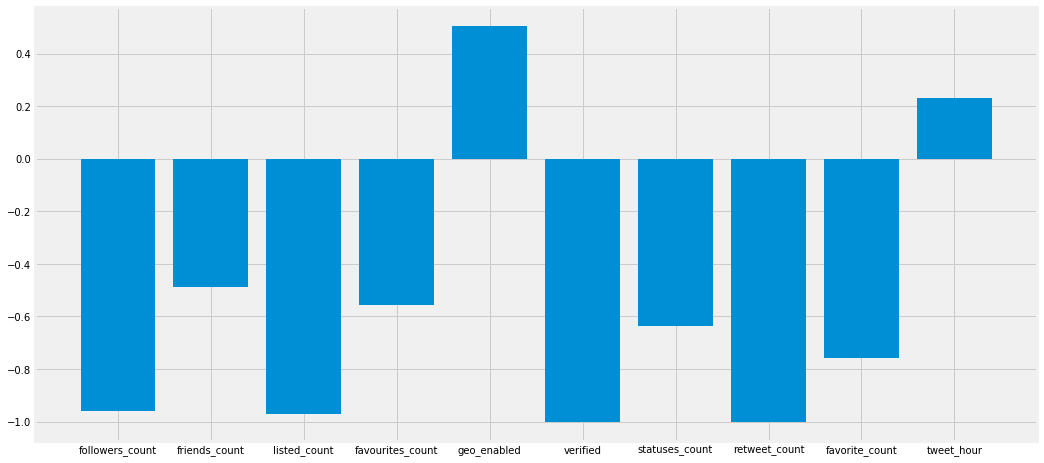

In [24]:
# method:
#Look at the difference between medians and means of each data
mean_median_spread = dict()
for col in numeric_cols:
    spread = (df[col].median()/df[col].mean())-1 # % difference of median from mean
    mean_median_spread[col] = spread
print(mean_median_spread)
plt.rcParams['font.size'] = 10
plt.bar(mean_median_spread.keys(), mean_median_spread.values())
#A:
# geo enabled is most skewed left (hump to the right)
# --> median geo enabled < mean geo enabled 
# verified and favorite count are most skewed right (hump to left)
# --> median retweet_count/verified > mean favorite_count/verified
# tweet hour is most symmetric (closest to 0)

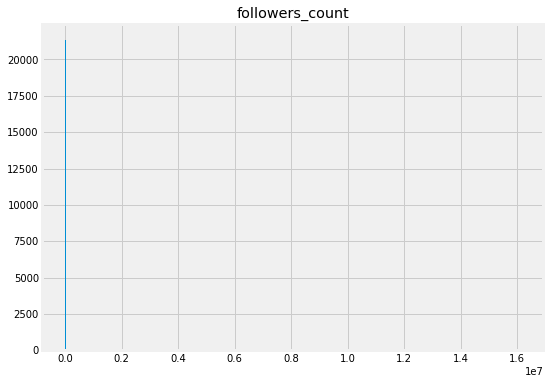

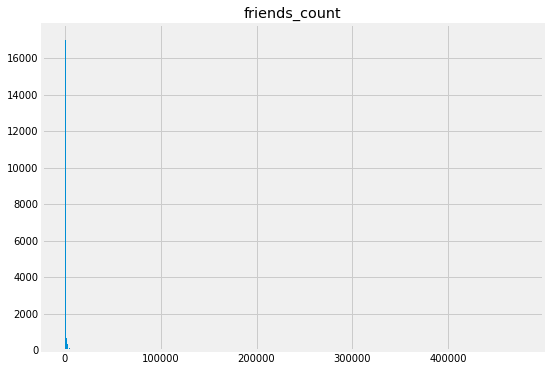

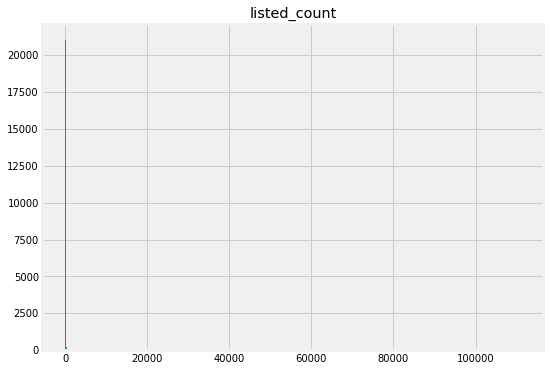

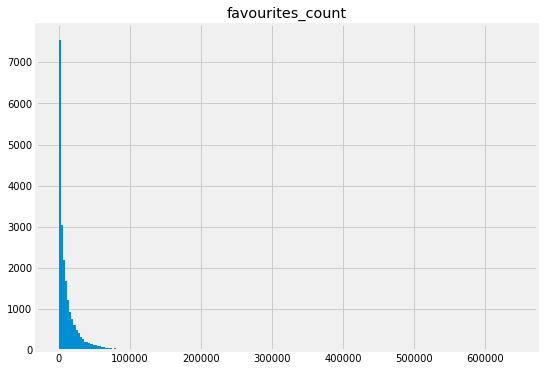

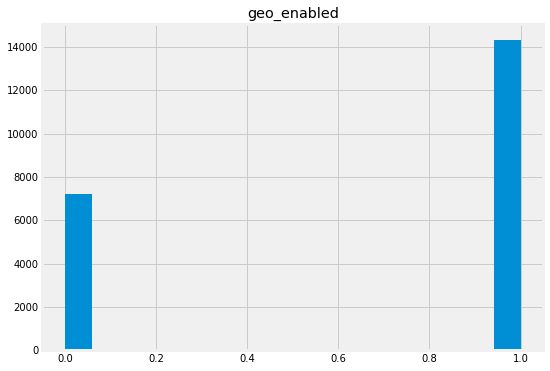

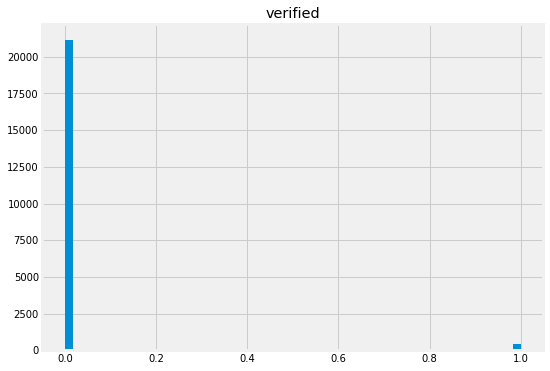

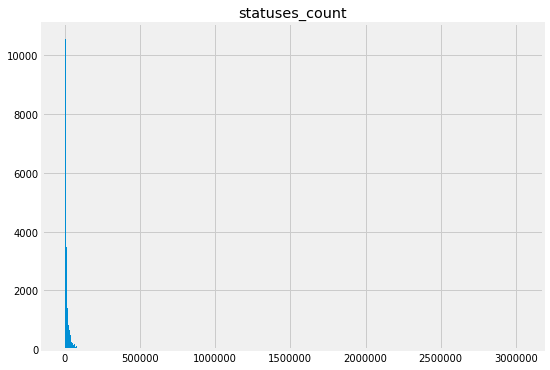

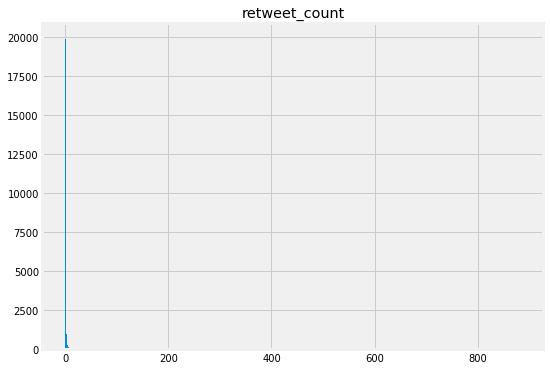

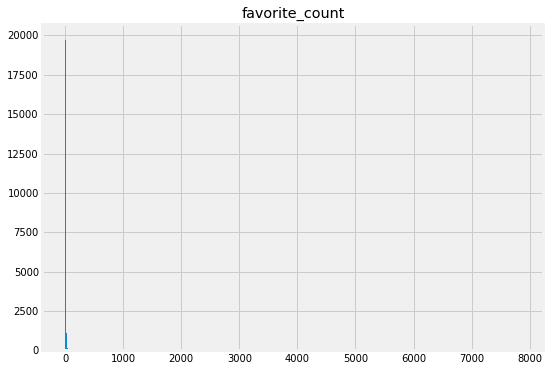

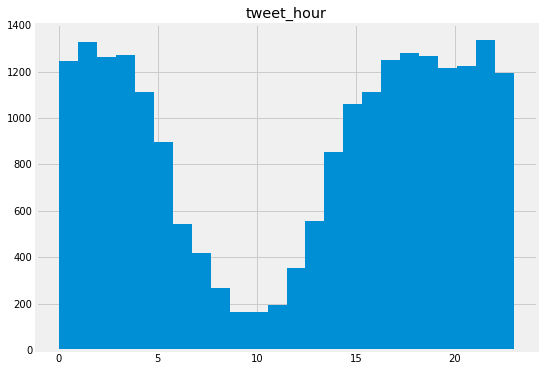

In [21]:
# check this with histograms:
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 10
for col in numeric_cols:
    plt.hist(df[col], bins='scott')
    plt.title(col)
    plt.show()
# reset params
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['font.size'] = 14

### 8. Repeat question 6 but scale the variables by their range first.

As you may have noticed, the spread of the distribution contributed significantly to the results in question 6.

followers_count_range_scaled


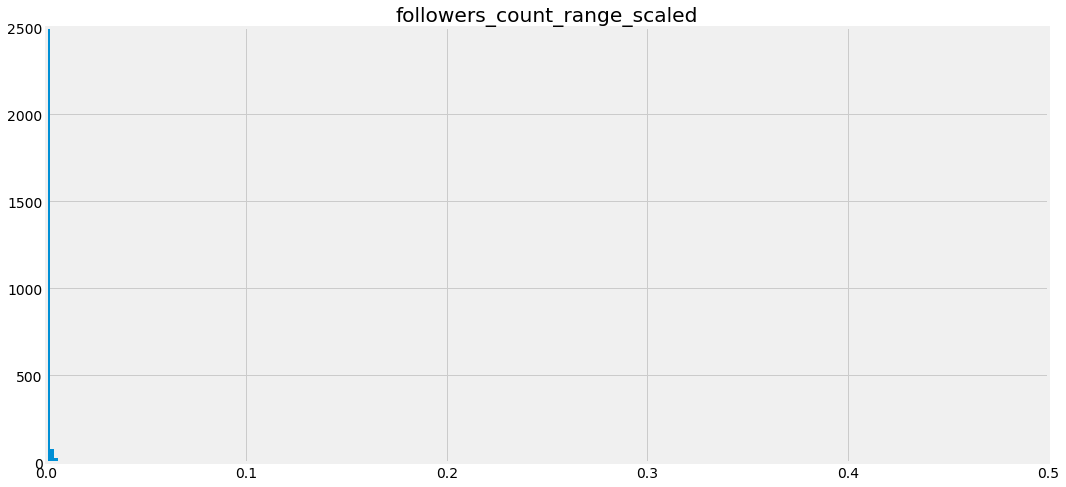

friends_count_range_scaled


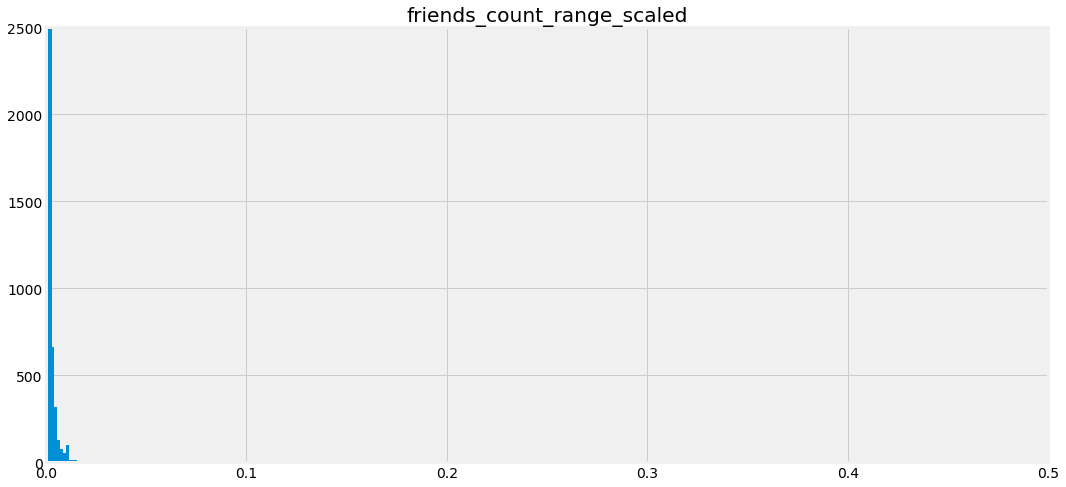

listed_count_range_scaled


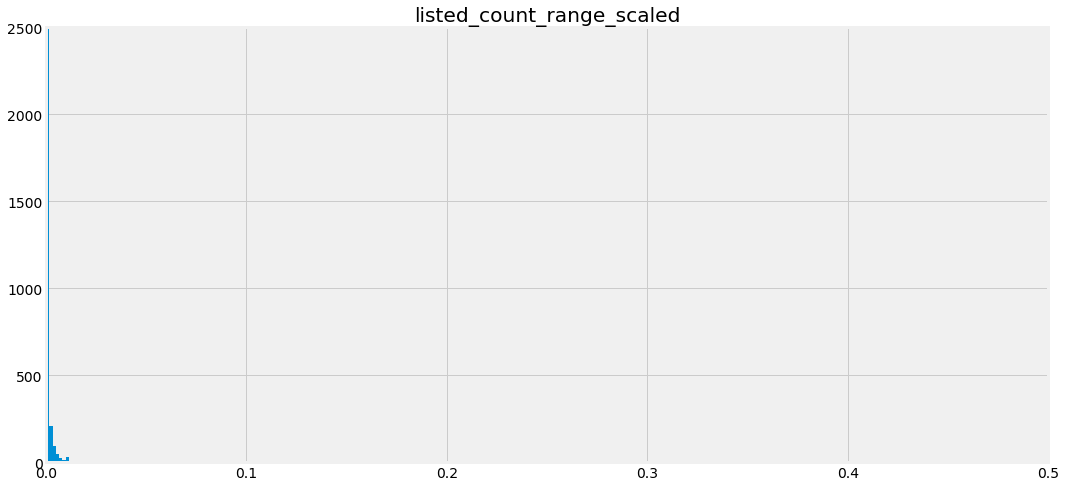

favourites_count_range_scaled


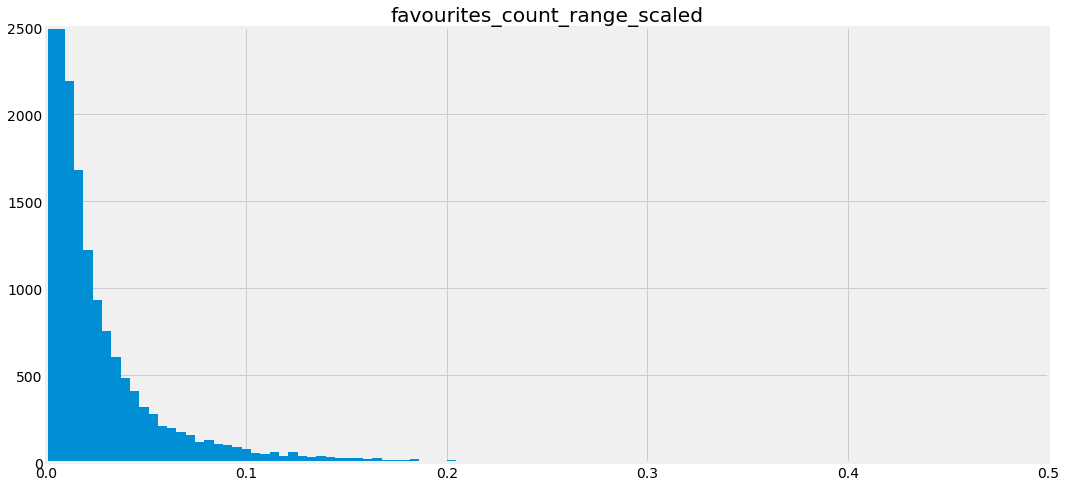

geo_enabled_range_scaled


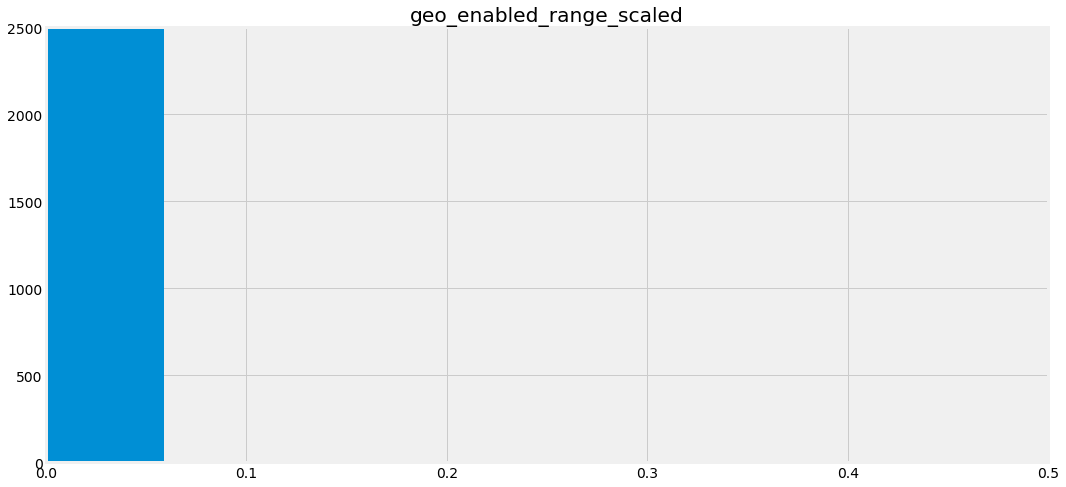

verified_range_scaled


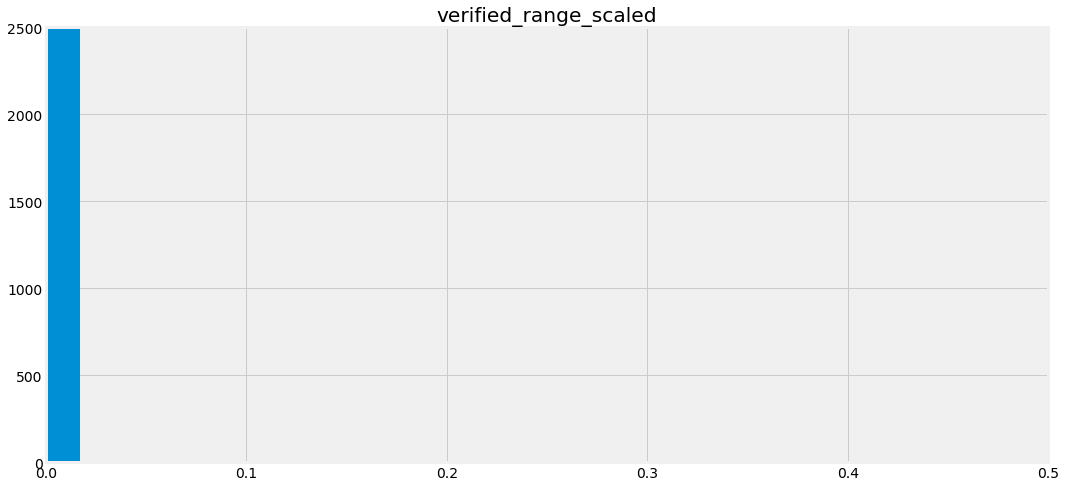

statuses_count_range_scaled


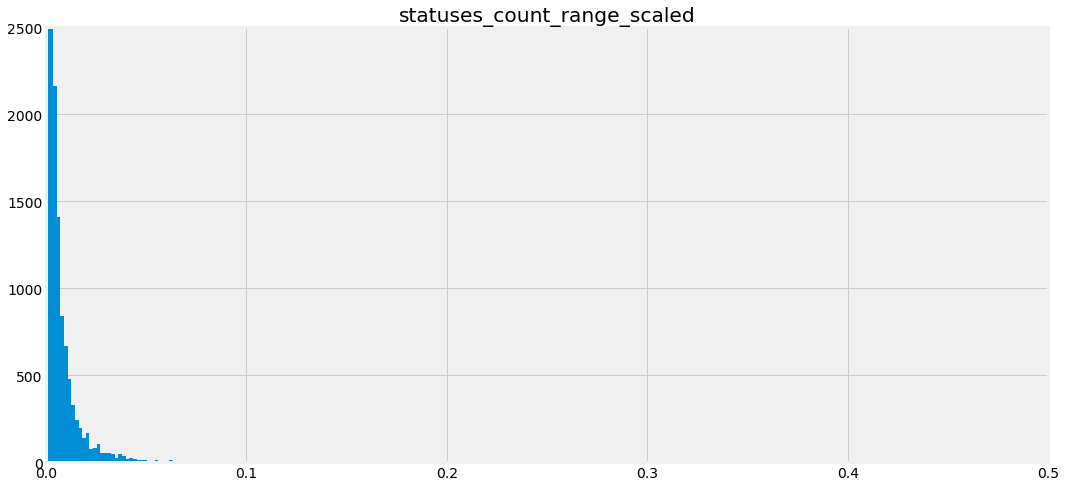

retweet_count_range_scaled


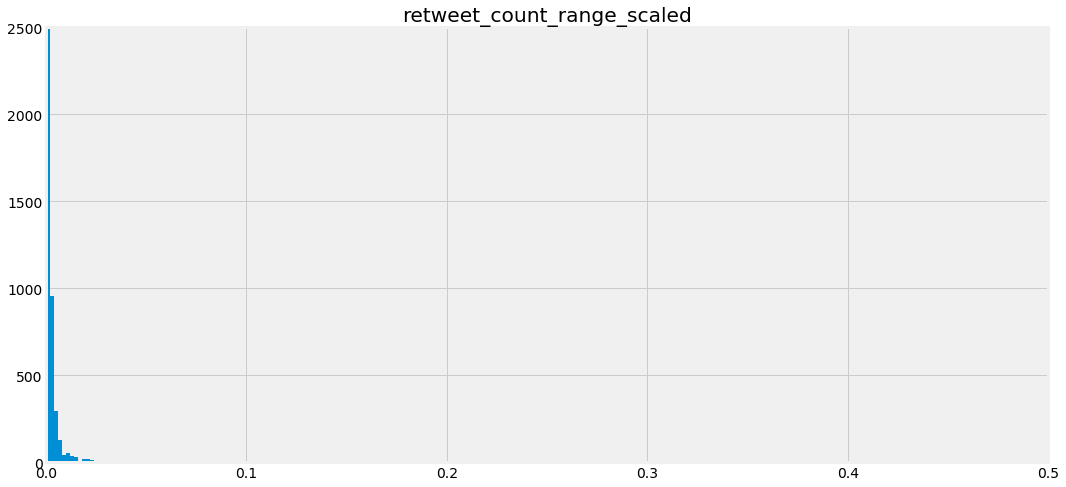

favorite_count_range_scaled


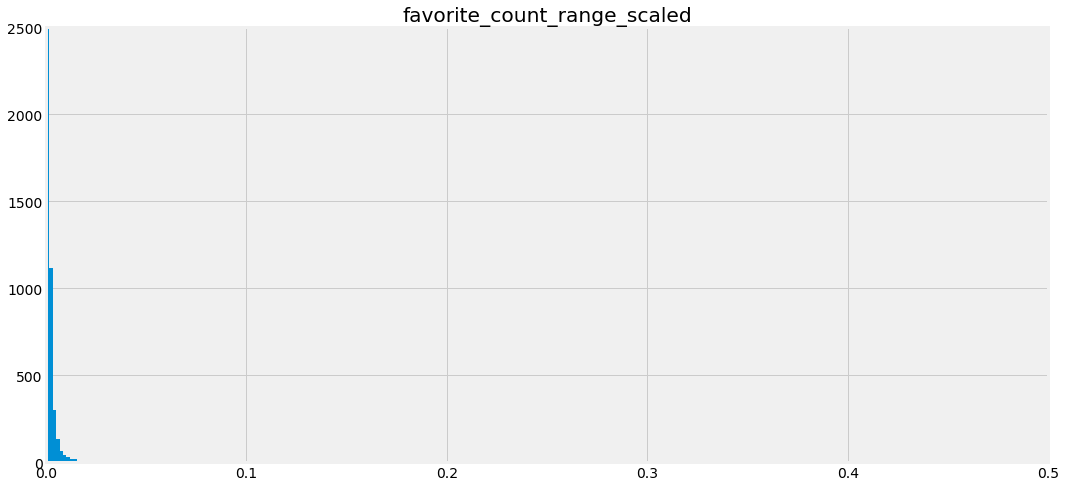

tweet_hour_range_scaled


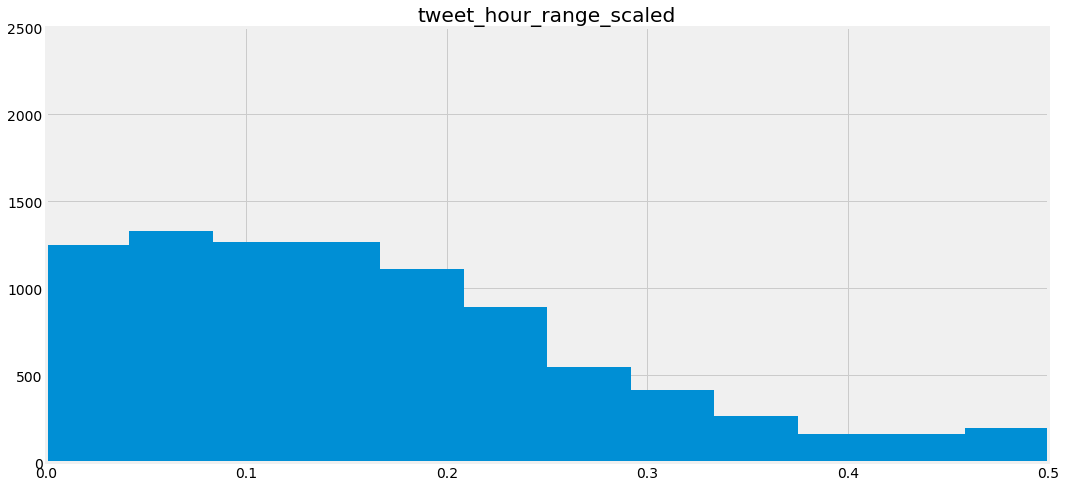

In [22]:
# A:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# all count variables
mean_median_scaled = dict() # new dict
for col in list(numeric_cols): #df.dtypes[df.dtypes == 'int64'].index
    new_col_name = col + '_range_scaled'
    print(new_col_name)
    df[new_col_name] = scaler.fit_transform(df[[col]])
    # add to new dict
    spread = (df[col + '_range_scaled'].median()/df[col + '_range_scaled'].mean())-1 # % difference of median from mean
    mean_median_scaled[col + '_range_scaled'] = spread
    # show dist
    plt.hist(df[new_col_name], bins = "scott")
    plt.title(new_col_name)
    plt.ylim([0,2500])
    plt.xlim([0,.5])
    plt.show()

{'followers_count_range_scaled': -0.9581599363959701, 'friends_count_range_scaled': -0.4891870906772692, 'listed_count_range_scaled': -0.9727119363455623, 'favourites_count_range_scaled': -0.5562500589893222, 'geo_enabled_range_scaled': 0.504079213443972, 'verified_range_scaled': -1.0, 'statuses_count_range_scaled': -0.6355742572598075, 'retweet_count_range_scaled': -1.0, 'favorite_count_range_scaled': -0.7572340210014779, 'tweet_hour_range_scaled': 0.23255734220180058}


<BarContainer object of 10 artists>

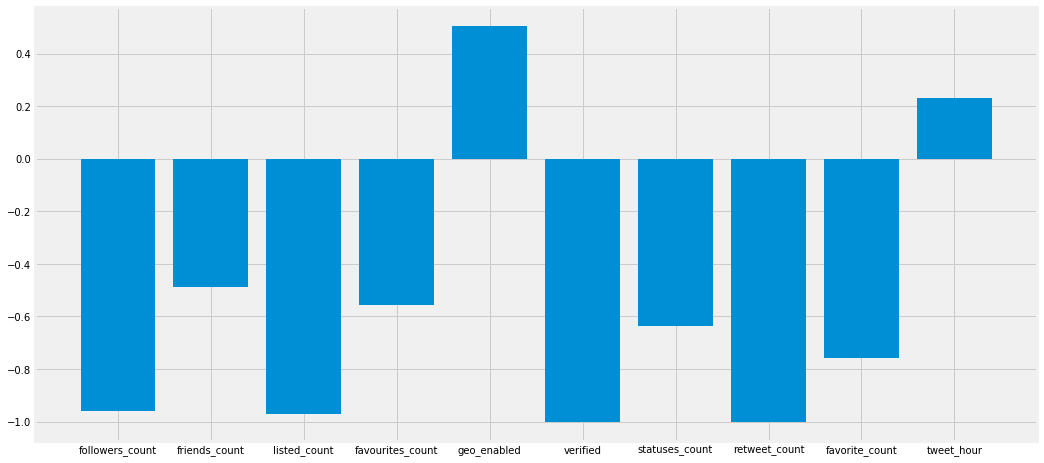

In [23]:
print(mean_median_scaled)
plt.rcParams['font.size'] = 10
plt.bar([key.replace('_range_scaled','') for key in mean_median_scaled.keys()], mean_median_scaled.values())

#A:
# geo enabled is still most skewed left (hump to the right)
# --> mean geo enabled is 50% larger than median geo enabled 
# verified and favorite count are still most skewed right (hump to left)
# --> mean retweet_count/verified are 100% smaller than median favorite_count/verified 
# tweet hour is most symmetric (closest to 0)

In [86]:
df.describe()

,id,date_scraped,tweet_hour,followers_count,friends_count,listed_count,favourites_count,statuses_count,retweet_count,favorite_count,...,followers_count_range_scaled,friends_count_range_scaled,listed_count_range_scaled,favourites_count_range_scaled,geo_enabled_range_scaled,verified_range_scaled,statuses_count_range_scaled,retweet_count_range_scaled,favorite_count_range_scaled,tweet_hour_range_scaled
count,1.636000e+04,1.636000e+04,16360.000000,1.636000e+04,16360.000000,16360.000000,16360.000000,1.636000e+04,16360.000000,16360.000000,...,16360.000000,16360.000000,16360.000000,16360.000000,16360.000000,16360.000000,16360.000000,16360.000000,16360.000000,16360.000000
mean,1.056664e+18,2.018107e+07,12.291565,8.234572e+03,639.296883,61.893582,14211.982763,1.558767e+04,0.941198,7.863692,...,0.000604,0.001344,0.001265,0.022181,0.666076,0.019132,0.009495,0.001103,0.001643,0.534416
std,1.908685e+15,3.869558e+01,7.848321,2.151499e+05,4667.202037,990.484824,24555.691090,3.800506e+04,13.419564,79.929841,...,0.015772,0.009813,0.020239,0.038325,0.471627,0.136993,0.023152,0.015732,0.016704,0.341231
min,1.053436e+18,2.018103e+07,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.054925e+18,2.018103e+07,4.000000,1.590000e+02,177.000000,0.000000,1513.500000,1.401750e+03,0.000000,0.000000,...,0.000012,0.000372,0.000000,0.002362,0.000000,0.000000,0.000853,0.000000,0.000000,0.173913
50%,1.056701e+18,2.018103e+07,15.000000,3.945000e+02,339.000000,2.000000,6242.500000,5.762500e+03,0.000000,2.000000,...,0.000029,0.000713,0.000041,0.009743,1.000000,0.000000,0.003510,0.000000,0.000418,0.652174
75%,1.058248e+18,2.018111e+07,19.000000,7.980000e+02,603.250000,6.000000,16538.250000,1.649475e+04,0.000000,5.000000,...,0.000058,0.001268,0.000123,0.025812,1.000000,0.000000,0.010048,0.000000,0.001045,0.826087
max,1.059958e+18,2.018111e+07,23.000000,1.364122e+07,475632.000000,48940.000000,640728.000000,1.641556e+06,853.000000,4785.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 9. Univariate analysis of your choice

Conduct a full univariate analysis on MEDV, CHAS, TAX, and RAD. 

For each variable, you should answer the three questions generally asked in a univariate analysis using the most appropriate metrics.
- A measure of central tendency
- A measure of spread
- A description of the shape of the distribution (plot or metric based)

If you feel there is additional information that is relevant, include it. 

In [25]:
# A: retweet count
df.retweet_count.describe()

count    21570.000000
mean         0.940519
std         14.028102
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        883.000000
Name: retweet_count, dtype: float64

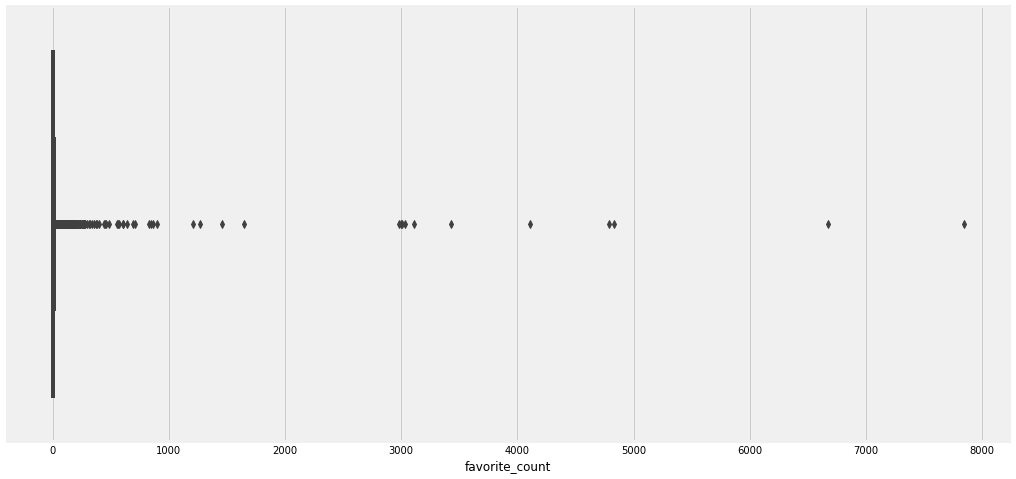

In [26]:
# high standard deviation (spread)
# mean retweets is 1000, but median is 1
# very large maximum can be due to outliers for news orgs
sns.boxplot(df.favorite_count)

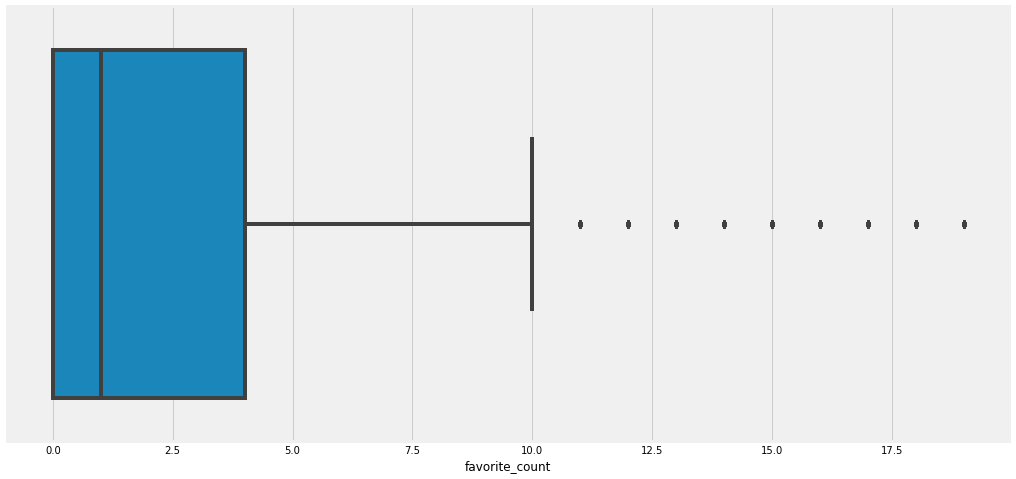

In [27]:
sns.boxplot(df.favorite_count[df.favorite_count < 20])

### 10. Have you been using inferential statistics, descriptive statistics, or both?

For each exercise, identify the branch of statistics on which you relied for your answer.

In [92]:
# A: descriptive statistics

### 11. Reducing the number of observations

It seems likely that this data is a census - that is, the data set includes the entire target population. Suppose that the 506 observations was too much for our computer (as unlikely as this might be) and we needed to pare this down to fewer observations. 

**11.A Use the `random.sample()` function to select 50 observations from `'AGE'`.**

([This documentation](https://docs.python.org/2/library/random.html) may be helpful.)

In [28]:
# A:
random.sample(list(df['screen_name']), 50)

['natalierigot',
 'camofbeans',
 'mikecole1012',
 'DAWilsoNC',
 'KOURTNEYYPAIIGE',
 'nicknational',
 'yardio',
 '502Colin',
 'MarkHorgas',
 'jacksgjeli',
 'sienafontanesi',
 'patasuciaaa',
 'DIEBYMYSELF',
 'Sav_zakman38',
 'DeeWarne',
 'TinyDes_16',
 'courtneyskye',
 'seaholmrocksmi',
 '_WaIsh_',
 '_Nikki_Marie',
 'ahass33',
 'japan_vapor',
 'shytutorialgirl',
 'DonnellaMiller',
 '_lexluth_',
 'KaGreenes',
 'sarahhh0813',
 'gloomwa',
 'jchristianson77',
 'SITOBIYBONNET',
 'tonitys',
 'JordanRutledge',
 'ooraaroo',
 'radelexis',
 'DrunkBakra',
 '_blondo_',
 'highitskalli',
 'tommyhiltrigga',
 'Iurnp',
 'shreddyxkrevger',
 'anthony_2752',
 'lizzardmerrill',
 'AManInRecovery',
 'sjcardenas9121',
 'adamSnells1017',
 'alaynariguez',
 'x_shenro',
 'MylanSauce',
 'beclynnT',
 'ChelseyChickie']

**11.B Identify the type of sampling we just used.**

In [94]:
# A: Random sampling without replacement

### 12. [BONUS] Of the remaining types of sampling, describe (but do not execute) how you might implement at least one of these types of sampling.


In [29]:
# A: random sampling with replacement, used for bootstrapping, etc
import numpy as np
np.random.choice(list(df['screen_name']), 50, replace=True)

array(['AlliMichelle98', 'bandi_c00t', 'DexxPj', 'Sadieisonfire',
       'rsarahsez', 'schoxknmyer', '_Demrie_', 'rltyewitt',
       'BombShitNoah', 'guitarjffs', 'vitaliykorotki2', 'SammieMarie47',
       'Hofftastic', 'snailbitch', 'samxleighh', 'jo_twy',
       'DeplorableDJD', 'berniemacsho', 'Rae_gross21', 'kynleighkp',
       'bm_tate', 'Briles585', 'sapphicsomeone', 'McKinleyb1215',
       'carter_JPG', 'Chance_Smith_', 'gabii_ann', 'goucher1933',
       'OGxGoodman', 'actuallymaryj', 'annieltyler', 'izzymarrieee',
       'megisokaytoday', 'iloveanxiety', 'Waluggi', 'abbs_christie_',
       'garciagera97', 'Griffyyyc', 'whatrewesnackin', 'OllieSantorelli',
       '_coleparker', 'katievaught', 'kennawillette', 'CTomberlin95',
       'JGTillman_62', 'lyss_camille11', 'JacobsenBradley', 'befink97',
       'CoffeePotSmasha', 'RedbaronKA'], dtype='<U15')